In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# NLP
import nltk
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [5]:
# deep learning libraries

# !pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Attempting uninstall: torch
    Found existing installation: torch 1.8.1
    Uninstalling torch-1.8.1:
      Successfully uninstalled torch-1.8.1


In [41]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [40]:
#SHAP

# !pip install shap

import shap

In [3]:
#load the file

MFcombine = pd.read_csv('MFCombine.csv')[['ratings', 'review']]

In [4]:
MFcombine.head()

,ratings,review
0,2,not a beef replacment go for something else ha...
1,5,shocked my meat eating friends with these deli...
2,5,best meatless burgers on the market hubby and ...
3,1,worst vegan burger available how could anyone ...
4,1,truly disgusting honestly never tried anything...


In [5]:
# instantiate model

# tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [6]:
# tokens = tokenizer.encode('', return_tensors='pt')

In [7]:
# result = model(tokens)

In [8]:
# result.logits

tensor([[-0.5486, -0.4852,  0.2038,  0.3929,  0.2652]],
       grad_fn=<AddmmBackward>)

In [9]:
# int(torch.argmax(result.logits))+1

4

In [10]:
# def sentiment_score(review):
#     tokens = tokenizer.encode(review, return_tensors='pt')
#     result = model(tokens)
#     return int(torch.argmax(result.logits))+1

In [11]:
# MFcombine['sentiment'] = MFcombine['review'].apply(sentiment_score)

In [12]:
# MFcombine

,ratings,review,sentiment
0,2,not a beef replacment go for something else ha...,2
1,5,shocked my meat eating friends with these deli...,5
2,5,best meatless burgers on the market hubby and ...,5
3,1,worst vegan burger available how could anyone ...,1
4,1,truly disgusting honestly never tried anything...,1
5,1,not as good as others i like meatless farm min...,2
6,1,terrible smell even worse taste i bought this ...,1
7,1,the worst truly revolting a strange almost che...,1
8,5,love it love them,5
9,5,very very good amazing taste and texture,5


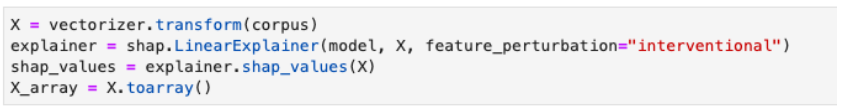

reference: https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/text.html

In [49]:
!pip install NLP-python

In [51]:
from NLP import NLP
nlp = NLP()

In [57]:
!pip install datasets

  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.7.4
    Uninstalling fsspec-0.7.4:
      Successfully uninstalled fsspec-0.7.4


In [52]:
import shap
import transformers
# import nlp
import torch
import numpy as np
import scipy as sp

In [58]:
# Let's import the library. We typically only need at most four methods:
from datasets import list_datasets, list_metrics, load_dataset, load_metric


In [46]:
# load a BERT sentiment analysis model
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = transformers.DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
).cuda()

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [53]:
# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [54]:
# build an explainer using a token masker
explainer = shap.Explainer(f, tokenizer)


In [68]:
explainer

In [60]:
# explain the model's predictions on IMDB reviews
imdb_train = load_dataset("imdb")["train"]


Downloading:   0%|          | 0.00/84.1M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset imdb downloaded and prepared to C:\Users\Leemei\.cache\huggingface\datasets\imdb\plain_text\1.0.0\e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a. Subsequent calls will reuse this data.


In [64]:
imdb_train[:1]

{'text': ['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'],
 'label': [1]}

In [67]:
shap_values = explainer(imdb_train[:1], fixed_context=1)

RuntimeError: CUDA out of memory. Tried to allocate 12.00 MiB (GPU 0; 2.00 GiB total capacity; 1.15 GiB already allocated; 5.85 MiB free; 1.16 GiB reserved in total by PyTorch)